<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project</h3>
</div>


## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

## Load and Prepare Data

## EDA

In [2]:
# file_path = '/Users/benyamin/Desktop/Thesis-File/creditcard.csv'
# df=pd.read_csv('/Users/benyamin/Desktop/Thesis-File/creditcard.csv')
df=pd.read_csv(file_path)

In [3]:
df1=df.copy()
print('data:')
print(df1,'\n')
print(df1.info(),'\n')
print(df1.isnull().sum(),'\n')
df1=df1.dropna(axis='index')
df1=df1.reset_index()
print(df1.isnull().sum(),'\n')

data:
            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0

In [4]:
x=df1.iloc[:,:-1]
x=x.drop(columns='index')
y=df1.iloc[:,-1]
print('x:\n%s'%x,'\n')
print(x.describe(),'\n')
print('y:\n%s'%y)

x:
            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25

In [5]:
from imblearn.combine import SMOTEENN

smote_enn=SMOTEENN(random_state=42)
x_resampled,y_resampled=smote_enn.fit_resample(x,y)
print(y_resampled,'\n')
x1,y1=x_resampled,y_resampled
print('x_resampled:')
print(x1,'\n')
print('y_resampled:')
print(y1,'\n')

df2=pd.concat([x1,y1],axis=1)
print(df2,'\n')


0         0
1         0
2         0
3         0
4         0
         ..
541130    1
541131    1
541132    1
541133    1
541134    1
Name: Class, Length: 541135, dtype: int64 

x_resampled:
                 Time        V1        V2        V3        V4        V5  \
0            0.000000 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1            0.000000  1.191857  0.266151  0.166480  0.448154  0.060018   
2            1.000000 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3            1.000000 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4            2.000000 -1.158233  0.877737  1.548718  0.403034 -0.407193   
...               ...       ...       ...       ...       ...       ...   
541130  144838.659385 -6.379157  1.672637 -5.885670  2.068340 -0.668576   
541131   65965.011763 -2.479028  0.958932 -1.782249  1.541783 -1.191990   
541132   34592.129093 -1.799894  2.368957 -2.673997  1.705968 -1.355923   
541133  129683.002907  0.255234  2.432041 -5.388252  3.793925

In [6]:
num_1=0
for i in range(0,len(y1)):
    if y1[i]==1:
        num_1=num_1+1
print(num_1,'\n')

275740 



## Data Preprocessing

In [7]:
from  sklearn.model_selection import train_test_split





x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print('x_train:\n%s'%x_train,'\n')
print('y_train:\n%s'%y_train,'\n')

data_train=pd.concat([x_train,y_train],axis=1)
data_train=data_train.reset_index()
data_train.drop(columns='index',axis=1,inplace=True)
print('data_train:\n%s'%data_train,'\n')
print(data_train.describe(),'\n')
print('x_test:\n%s'%x_test,'\n')
print('y_test:\n%s'%y_test,'\n')

data_test=pd.concat([x_test,y_test],axis=1)
data_test=data_test.reset_index()
data_test.drop(columns='index',axis=1,inplace=True)
print('data_test:\n%s'%data_test)
print(data_test.describe(),'\n')




x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.14,random_state=42)
print('x_train1:\n%s'%x_train1,'\n')
print('y_train1:\n%s'%y_train1,'\n')

data_train1=pd.concat([x_train1,y_train1],axis=1)
data_train1=data_train1.reset_index()
data_train1.drop(columns='index',axis=1,inplace=True)
print('data_train1:\n%s'%data_train1,'\n')
print(data_train1.describe(),'\n')
print('x_test1:\n%s'%x_test1,'\n')
print('y_test1:\n%s'%y_test1,'\n')

data_test1=pd.concat([x_test1,y_test1],axis=1)
data_test1=data_test1.reset_index()
data_test1.drop(columns='index',axis=1,inplace=True)
print('data_test1:\n%s'%data_test1)
print(data_test1.describe(),'\n')

x_train:
            Time        V1        V2        V3        V4        V5        V6  \
83225    59741.0 -1.648591  1.228130  1.370169 -1.735542 -0.029455 -0.484129   
52800    45648.0 -0.234775 -0.493269  1.236728 -2.338793 -1.176733  0.885733   
21293    31579.0  1.134626 -0.774460 -0.163390 -0.533358 -0.604555 -0.244482   
133600   80455.0  0.069514  1.017753  1.033117  1.384376  0.223233 -0.310845   
38225    39302.0 -0.199441  0.610092 -0.114437  0.256565  2.290752  4.008475   
...          ...       ...       ...       ...       ...       ...       ...   
119879   75618.0  1.173488  0.100792  0.490512  0.461596 -0.296377 -0.213165   
259178  159000.0 -0.775981  0.144023 -1.142399 -1.241113  1.940358  3.912076   
131932   79795.0 -0.146609  0.992946  1.524591  0.485774  0.349308 -0.815198   
146867   87931.0 -2.948638  2.354849 -2.521201 -3.798905  1.866302  2.727695   
121958   76381.0  1.233174 -0.784851  0.386784 -0.698559 -1.034018 -0.637028   

              V7        V8    

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

data_train_scaled=pd.DataFrame(x_train)
data_train_scaled=pd.concat([data_train_scaled,data_train.iloc[:,-1]],axis=1)
data_train_scaled.columns=data_train.columns
print('data_train_scaled:\n%s'%data_train_scaled,'\n')

data_test_scaled=pd.DataFrame(x_test)
data_test_scaled=pd.concat([data_test_scaled,data_test.iloc[:,-1]],axis=1)
data_test_scaled.columns=data_test.columns
print('data_test_scaled:\n%s'%data_test_scaled)




x_train1=sc.fit_transform(x_train1)
x_test1=sc.transform(x_test1)

data_train_scaled1=pd.DataFrame(x_train1)
data_train_scaled1=pd.concat([data_train_scaled1,data_train1.iloc[:,-1]],axis=1)
data_train_scaled1.columns=data_train1.columns
print('data_train_scaled1:\n%s'%data_train_scaled1,'\n')

data_test_scaled1=pd.DataFrame(x_test1)
data_test_scaled1=pd.concat([data_test_scaled1,data_test1.iloc[:,-1]],axis=1)
data_test_scaled1.columns=data_test1.columns
print('data_test_scaled1:\n%s'%data_test_scaled1)

data_train_scaled:
            Time        V1        V2        V3        V4        V5        V6  \
0      -0.738270 -0.839525  0.738476  0.903933 -1.225050 -0.022385 -0.360859   
1      -1.035079 -0.119171 -0.295057  0.815902 -1.650872 -0.845845  0.662798   
2      -1.331382  0.578554 -0.463885 -0.107754 -0.376453 -0.435164 -0.181778   
3      -0.302019  0.035867  0.612165  0.681581  0.977236  0.158982 -0.231369   
4      -1.168730 -0.101168  0.367405 -0.075460  0.181137  1.642945  2.996328   
...          ...       ...       ...       ...       ...       ...       ...   
213600 -0.403890  0.598354  0.061619  0.323625  0.325864 -0.213968 -0.158376   
213601  1.352194 -0.394921  0.087575 -0.753606 -0.876043  1.391449  2.924292   
213602 -0.315919 -0.074249  0.597271  1.005806  0.342931  0.249472 -0.608256   
213603 -0.144569 -1.501913  1.414962 -1.663200 -2.681535  1.338295  2.039240   
213604 -0.387820  0.628765 -0.470123  0.255195 -0.493065 -0.743411 -0.475115   

              V7    

## Strorytelling - Visualization

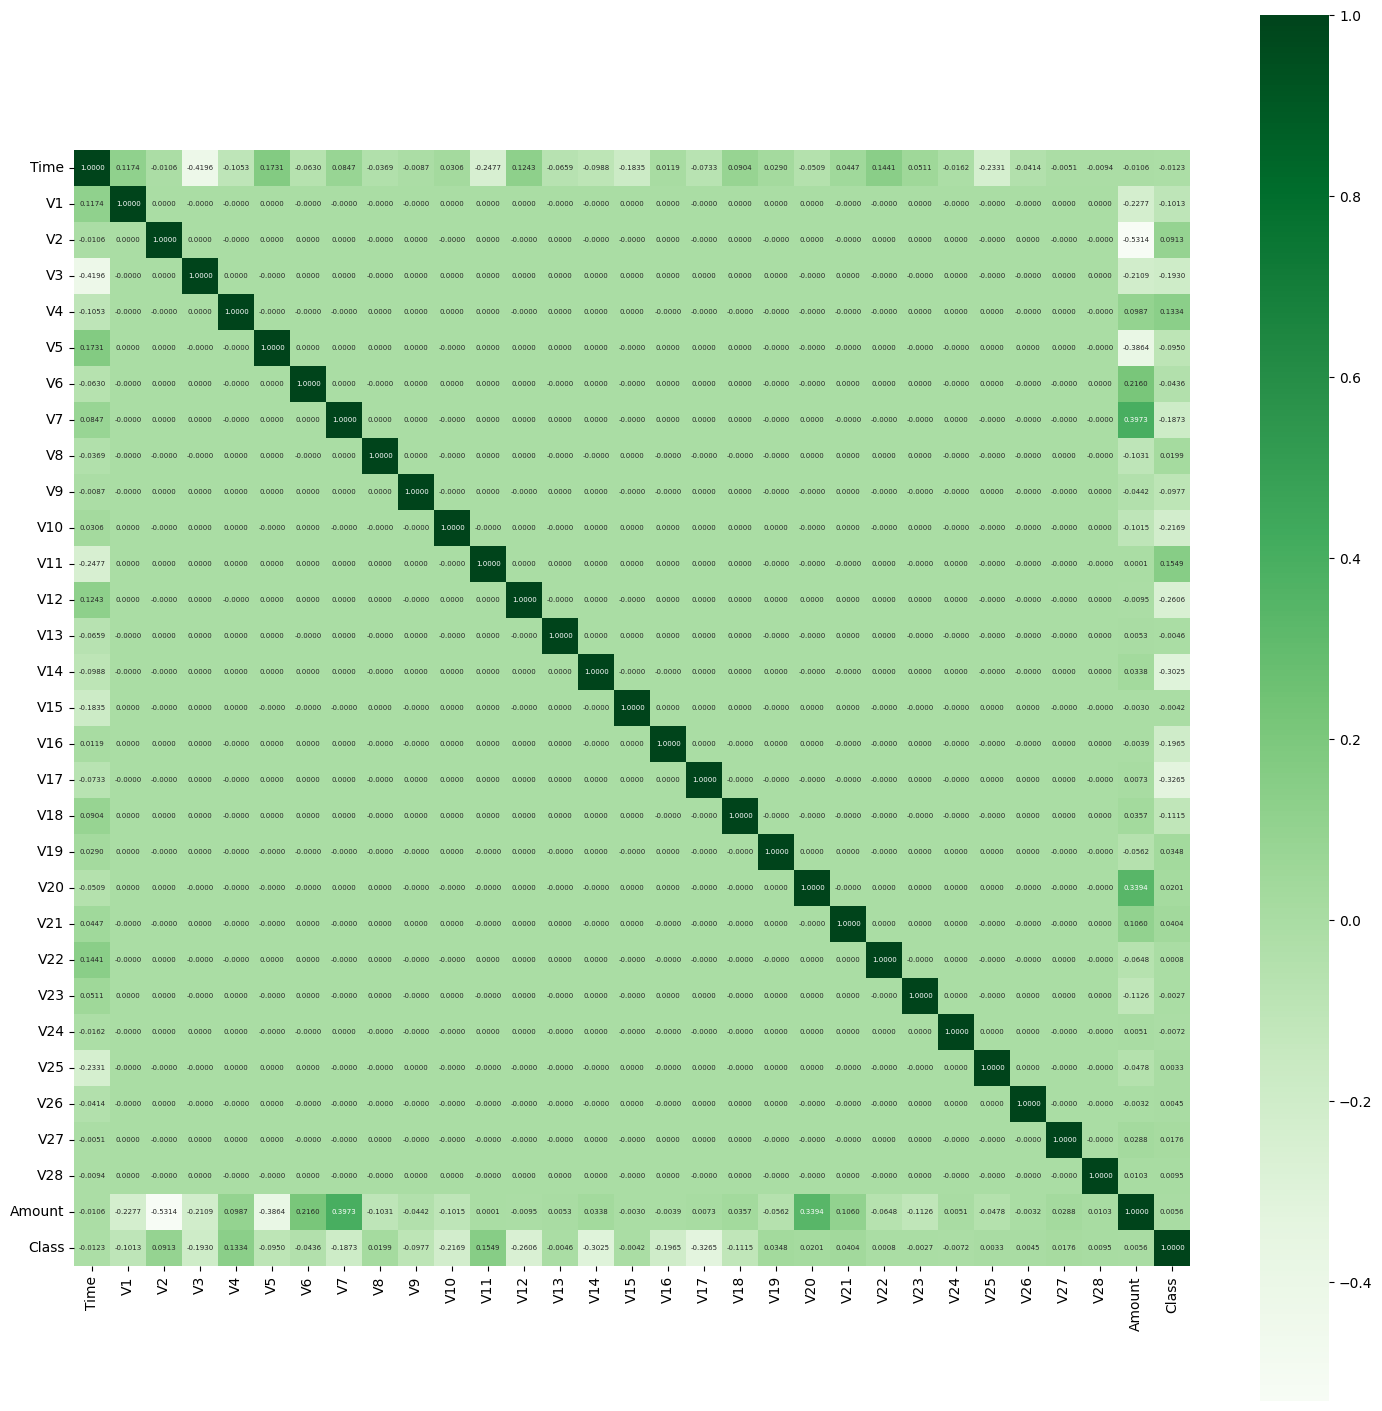

     index      Time            V1            V2            V3            V4  \
0    Class -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   
1      V11 -0.247689  2.248163e-16  1.965104e-16  1.603095e-15  3.498520e-16   
2       V4 -0.105260 -9.082889e-16 -1.125909e-15  4.644369e-16  1.000000e+00   
3       V2 -0.010593  4.188326e-16  1.000000e+00  3.140164e-16 -1.125909e-15   
4      V21  0.044736 -2.444306e-16 -8.277282e-17  5.931009e-17 -1.862123e-16   
5      V19  0.028975  1.480546e-16 -2.891532e-18  3.408492e-16 -4.042137e-16   
6      V20 -0.050866  4.551909e-16  2.405781e-16 -9.303429e-16 -1.808934e-16   
7       V8 -0.036949 -2.557889e-16 -5.698764e-17 -1.297365e-15  5.645256e-16   
8      V27 -0.005135  1.196577e-16 -4.938067e-16  1.058098e-15  4.577343e-17   
9      V28 -0.009413  2.108702e-15 -5.182198e-16  9.792787e-16 -3.888959e-18   
10  Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
11     V26 -0.041407 -1.745526e-17  1.98

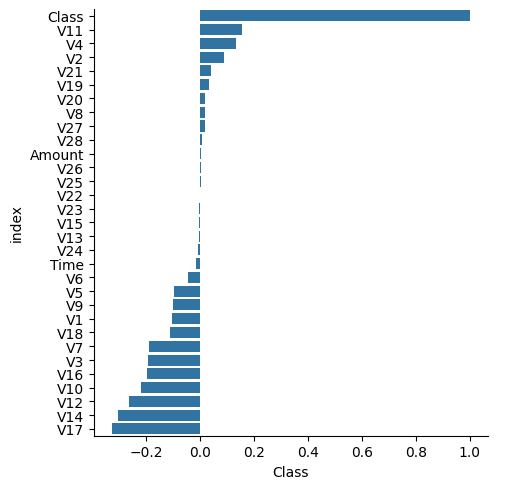

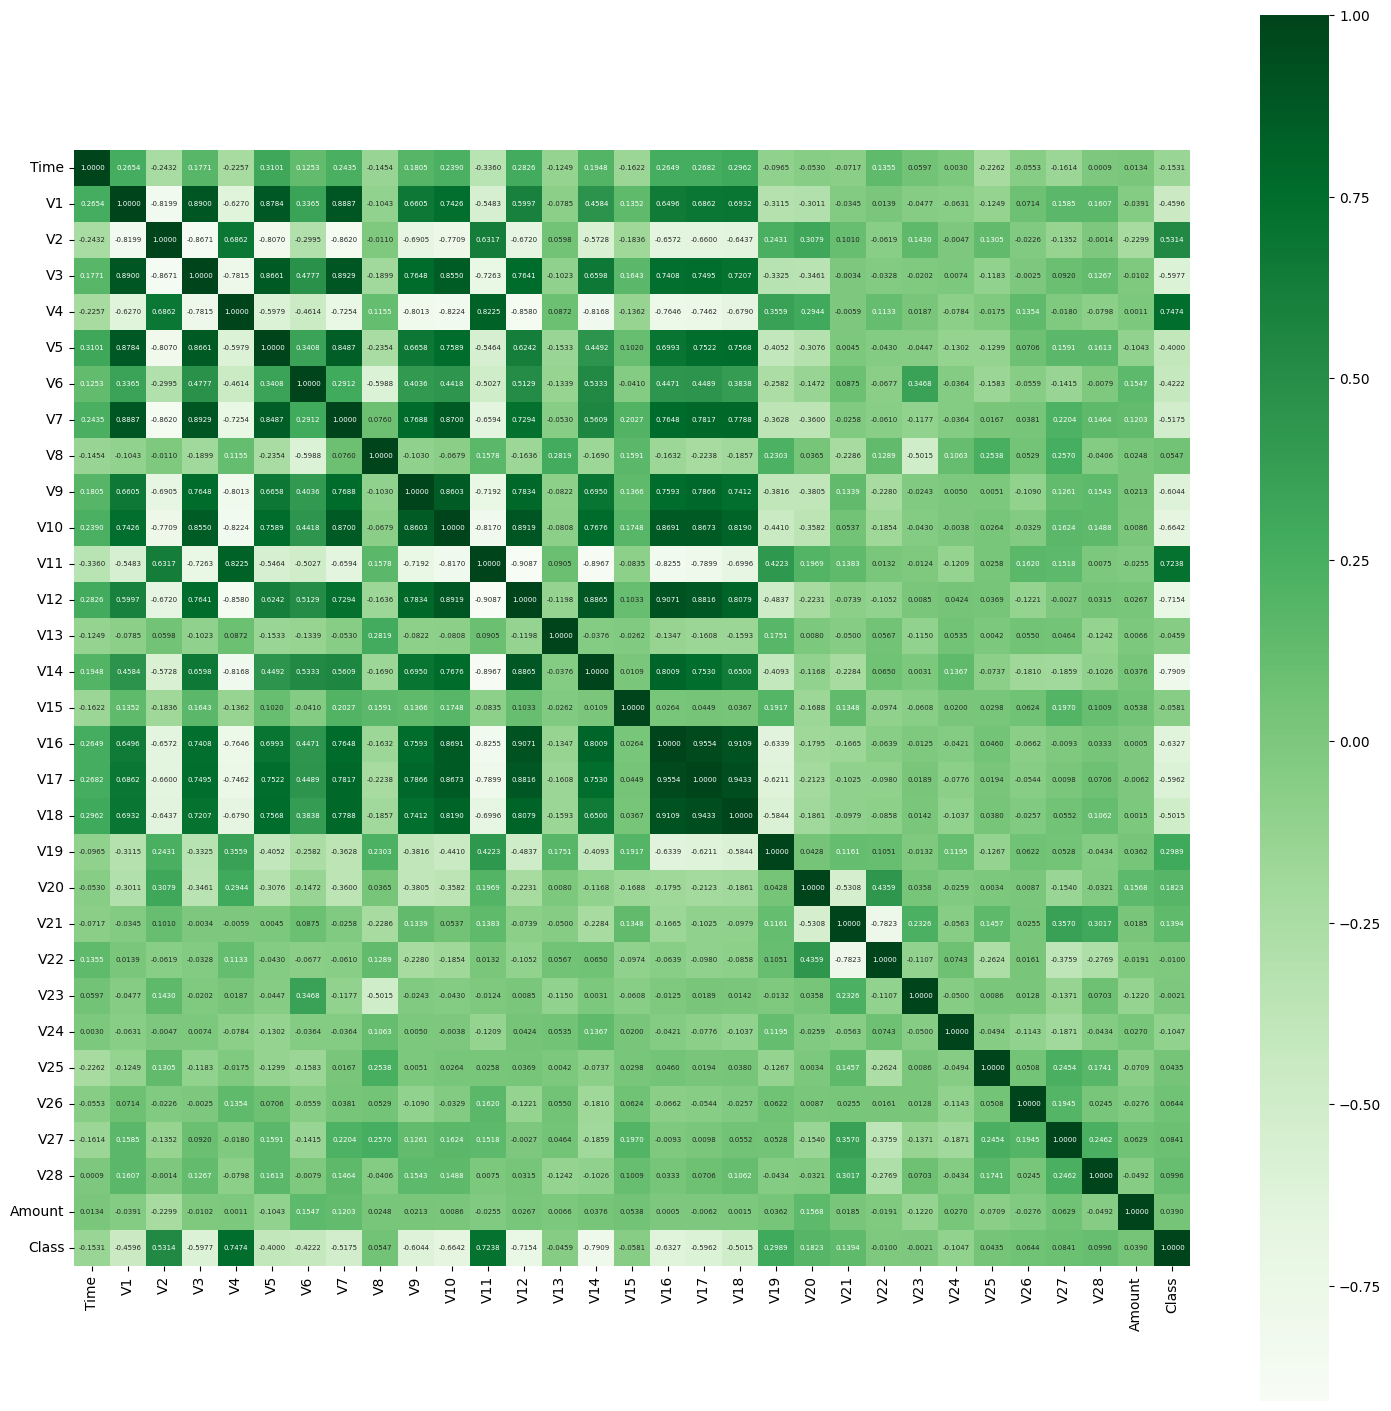

     index      Time        V1        V2        V3        V4        V5  \
0    Class -0.153095 -0.459556  0.531446 -0.597703  0.747420 -0.400026   
1       V4 -0.225721 -0.626975  0.686248 -0.781473  1.000000 -0.597878   
2      V11 -0.336028 -0.548276  0.631664 -0.726264  0.822465 -0.546354   
3       V2 -0.243223 -0.819901  1.000000 -0.867115  0.686248 -0.806988   
4      V19 -0.096507 -0.311504  0.243093 -0.332516  0.355915 -0.405204   
5      V20 -0.052952 -0.301116  0.307910 -0.346084  0.294418 -0.307644   
6      V21 -0.071718 -0.034517  0.100999 -0.003359 -0.005906  0.004467   
7      V28  0.000869  0.160686 -0.001436  0.126749 -0.079773  0.161342   
8      V27 -0.161443  0.158549 -0.135218  0.092020 -0.017993  0.159109   
9      V26 -0.055297  0.071384 -0.022624 -0.002481  0.135396  0.070650   
10      V8 -0.145351 -0.104301 -0.010984 -0.189919  0.115463 -0.235424   
11     V25 -0.226216 -0.124892  0.130544 -0.118297 -0.017514 -0.129897   
12  Amount  0.013419 -0.039144 -0.2299

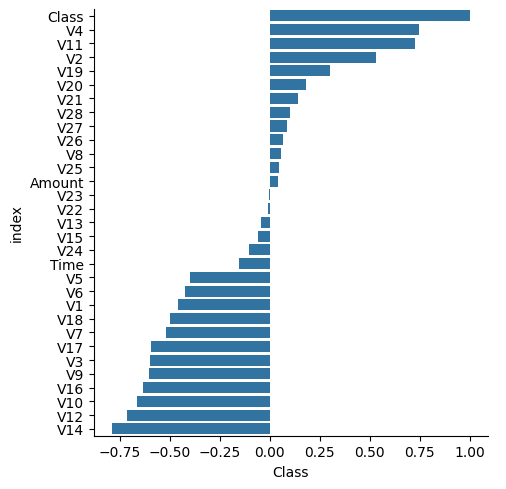

In [9]:
df1=df1.drop(columns='index')
corr=df1.iloc[:,:].corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr,cbar=True,square=True,fmt='.4f',annot=True,annot_kws={'size':5},cmap='Greens')
plt.show()
d_corr=corr.sort_values(by=['Class'],ascending=False)
d_corr=d_corr.reset_index()
print(d_corr)
d_corr.to_json('/Users/benyamin/Desktop/Dev/Projects/Laravel/tus/backend/public/reports/d_corr.json',orient='records',indent=4)
sns.catplot(d_corr,x='Class',y='index',kind='bar',aspect=1)
plt.show()



corr1=df2.iloc[:,:].corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr1,cbar=True,square=True,fmt='.4f',annot=True,annot_kws={'size':5},cmap='Greens')
plt.show()
d_corr1=corr1.sort_values(by=['Class'],ascending=False)
d_corr1=d_corr1.reset_index()
print(d_corr1)
d_corr1.to_json('/Users/benyamin/Desktop/Dev/Projects/Laravel/tus/backend/public/reports/d_corr1.json',orient='records',indent=4)
sns.catplot(d_corr1,x='Class',y='index',kind='bar',aspect=1)
plt.show()






x_train dataframe:
            Time        V1        V2        V3        V4        V5        V6  \
0      -0.738270 -0.839525  0.738476  0.903933 -1.225050 -0.022385 -0.360859   
1      -1.035079 -0.119171 -0.295057  0.815902 -1.650872 -0.845845  0.662798   
2      -1.331382  0.578554 -0.463885 -0.107754 -0.376453 -0.435164 -0.181778   
3      -0.302019  0.035867  0.612165  0.681581  0.977236  0.158982 -0.231369   
4      -1.168730 -0.101168  0.367405 -0.075460  0.181137  1.642945  2.996328   
...          ...       ...       ...       ...       ...       ...       ...   
213600 -0.403890  0.598354  0.061619  0.323625  0.325864 -0.213968 -0.158376   
213601  1.352194 -0.394921  0.087575 -0.753606 -0.876043  1.391449  2.924292   
213602 -0.315919 -0.074249  0.597271  1.005806  0.342931  0.249472 -0.608256   
213603 -0.144569 -1.501913  1.414962 -1.663200 -2.681535  1.338295  2.039240   
213604 -0.387820  0.628765 -0.470123  0.255195 -0.493065 -0.743411 -0.475115   

              V7    

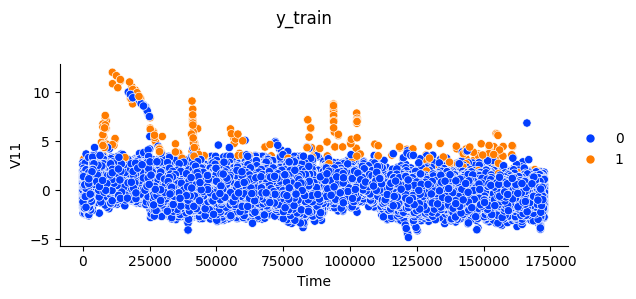

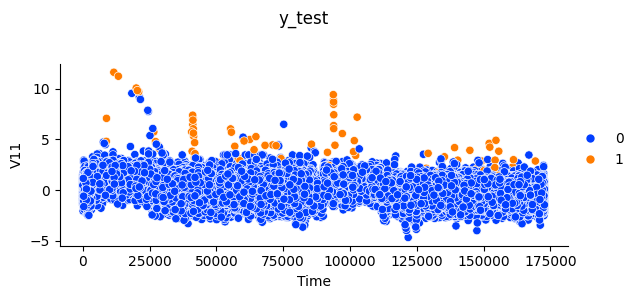

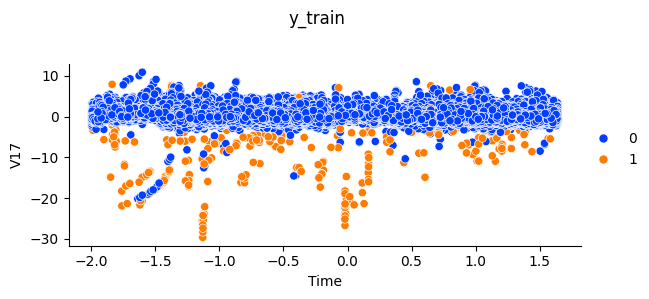

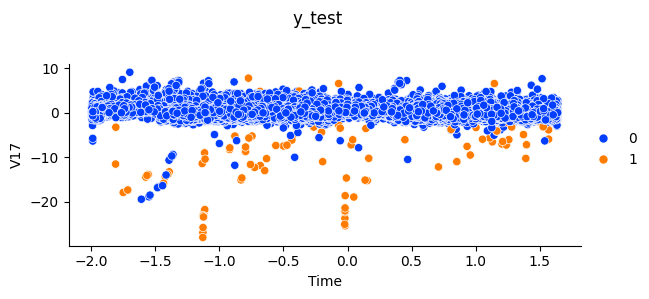

x_train1 dataframe:
            Time        V1        V2        V3        V4        V5        V6  \
0      -1.132861  0.318850 -0.192332  0.817164 -0.295984  0.319631  0.250697   
1      -1.172960  0.705251 -0.439059  0.260976 -0.853353  1.032558  2.067496   
2      -0.424423  0.018716 -0.242316  0.215797  0.120904 -0.363668  0.850070   
3      -1.073760 -0.105667  0.575056 -0.098097  0.894896 -0.420595 -0.366885   
4      -0.276154 -0.501744  0.694589  0.190227 -0.778081 -0.385596 -0.432917   
...          ...       ...       ...       ...       ...       ...       ...   
465371 -0.247610  0.246810 -0.473057  0.874075 -0.659889  0.110473  0.806125   
465372  1.666527  0.288535 -0.245951  0.464009 -1.249853  0.498147  0.259339   
465373 -0.961718 -2.016458  1.282051 -1.628482  1.580353 -2.451762 -1.318085   
465374 -0.057943  0.495084 -0.448987  0.752290 -0.589396  0.395969  0.704487   
465375 -0.158388  0.401954 -0.291639  1.025912  0.221268  0.307930  0.579303   

              V7   

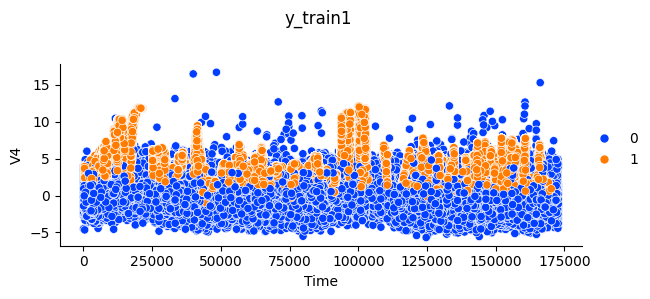

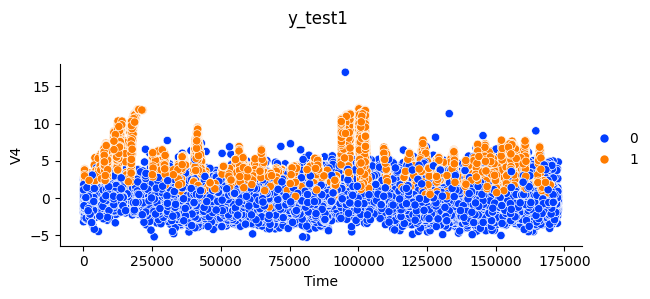

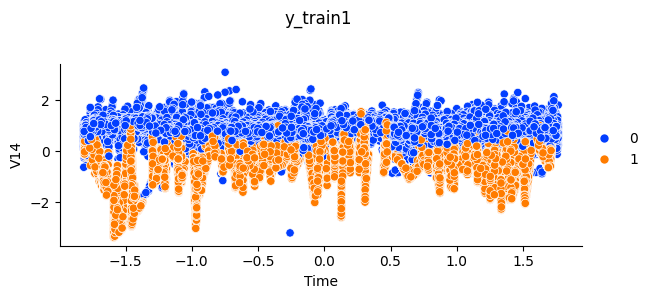

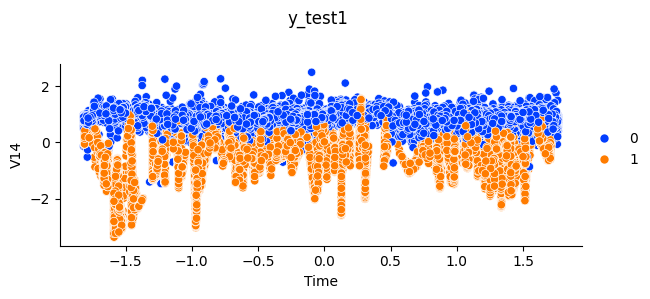

In [10]:
d_x_train=pd.DataFrame(x_train)
d_x_train.columns=data_train.columns[:-1]
print('x_train dataframe:')
print(d_x_train,'\n')


d_x_test=pd.DataFrame(x_test)
d_x_test.columns=data_test.columns[:-1]
print('x_test dataframe:')
print(d_x_test,'\n')


#آماده سازی y_train و y_test
y_train=np.array(list(y_train))
print('y_train:\n%s'%y_train,'\n')
y_test=np.array(list(y_test))
print('y_test:\n%s'%y_test,'\n')


# نمودار برای داده های اولیه
sns1=sns.relplot(data=data_train,x=data_train.iloc[:,0],y=data_train.iloc[:,11],hue=y_train,palette='bright',height=3,aspect=2)
plt.xlabel(data_train.columns[0])
plt.ylabel(data_train.columns[11])
sns1.fig.suptitle('y_train')
sns1.fig.subplots_adjust(top=0.8)
plt.show()

sns2=sns.relplot(data=data_test,x=data_test.iloc[:,0],y=data_test.iloc[:,11],hue=y_test,palette='bright',height=3,aspect=2)
plt.xlabel(data_test.columns[0])
plt.ylabel(data_test.columns[11])
sns2.fig.suptitle('y_test')
sns2.fig.subplots_adjust(top=0.8)
plt.show()

# نمودار برای داده های نرمال شده
sns1=sns.relplot(data=data_train_scaled,x=data_train_scaled.iloc[:,0],y=data_train_scaled.iloc[:,17],hue=y_train,palette='bright',height=3,aspect=2)
plt.xlabel(data_train_scaled.columns[0])
plt.ylabel(data_train_scaled.columns[17])
sns1.fig.suptitle('y_train')
sns1.fig.subplots_adjust(top=0.8)
plt.show()

sns2=sns.relplot(data=data_test_scaled,x=data_test_scaled.iloc[:,0],y=data_test_scaled.iloc[:,17],hue=y_test,palette='bright',height=3,aspect=2)
plt.xlabel(data_test_scaled.columns[0])
plt.ylabel(data_test_scaled.columns[17])
sns2.fig.suptitle('y_test')
sns2.fig.subplots_adjust(top=0.8)
plt.show()




d_x_train1=pd.DataFrame(x_train1)
d_x_train1.columns=data_train1.columns[:-1]
print('x_train1 dataframe:')
print(d_x_train1,'\n')


d_x_test1=pd.DataFrame(x_test1)
d_x_test1.columns=data_test1.columns[:-1]
print('x_test1 dataframe:')
print(d_x_test1,'\n')


#آماده سازی y_train و y_test
y_train1=np.array(list(y_train1))
print('y_train1:\n%s'%y_train1,'\n')
y_test1=np.array(list(y_test1))
print('y_test1:\n%s'%y_test1,'\n')


# نمودار برای داده های اولیه
sns1=sns.relplot(data=data_train1,x=data_train1.iloc[:,0],y=data_train1.iloc[:,4],hue=y_train1,palette='bright',height=3,aspect=2)
plt.xlabel(data_train1.columns[0])
plt.ylabel(data_train1.columns[4])
sns1.fig.suptitle('y_train1')
sns1.fig.subplots_adjust(top=0.8)
plt.show()

sns2=sns.relplot(data=data_test1,x=data_test1.iloc[:,0],y=data_test1.iloc[:,4],hue=y_test1,palette='bright',height=3,aspect=2)
plt.xlabel(data_test1.columns[0])
plt.ylabel(data_test1.columns[4])
sns2.fig.suptitle('y_test1')
sns2.fig.subplots_adjust(top=0.8)
plt.show()

# نمودار برای داده های نرمال شده
sns1=sns.relplot(data=data_train_scaled1,x=data_train_scaled1.iloc[:,0],y=data_train_scaled1.iloc[:,14],hue=y_train1,palette='bright',height=3,aspect=2)
plt.xlabel(data_train_scaled1.columns[0])
plt.ylabel(data_train_scaled1.columns[14])
sns1.fig.suptitle('y_train1')
sns1.fig.subplots_adjust(top=0.8)
plt.show()

sns2=sns.relplot(data=data_test_scaled1,x=data_test_scaled1.iloc[:,0],y=data_test_scaled1.iloc[:,14],hue=y_test1,palette='bright',height=3,aspect=2)
plt.xlabel(data_test_scaled1.columns[0])
plt.ylabel(data_test_scaled1.columns[14])
sns2.fig.suptitle('y_test1')
sns2.fig.subplots_adjust(top=0.8)
plt.show()



In [11]:

list_score=[]

d_roc=dict()

list_m=[]
list_cm=[]


{'n_neighbors': 3}
0.7757894736842106 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.92      0.77      0.84       113

    accuracy                           1.00     71202
   macro avg       0.96      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202

             error     value
0   accuracy_score  0.999522
1  percision_score  0.915789
2     recall_score  0.769912
3         f1_score  0.836538
4              AUC  0.924659
5              MCC  0.839460


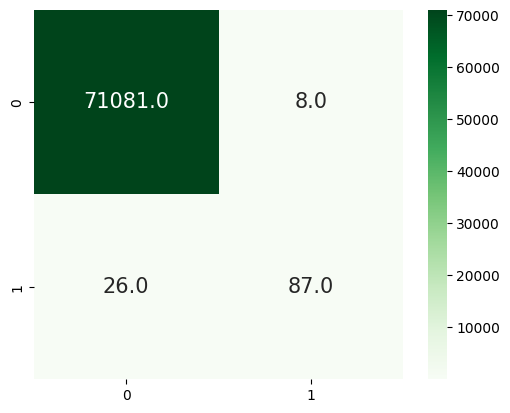

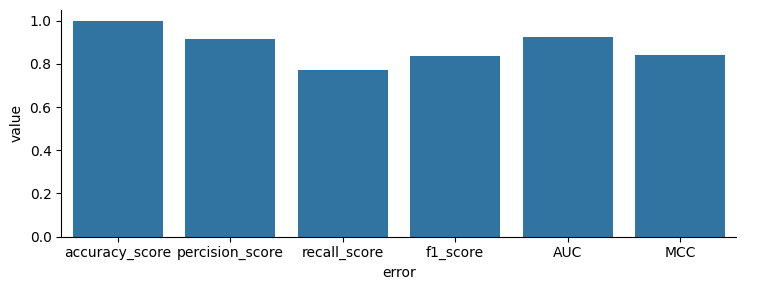

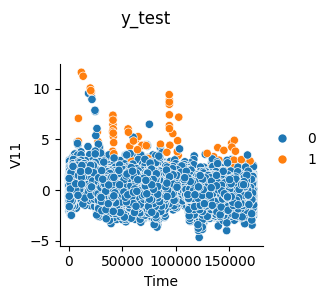

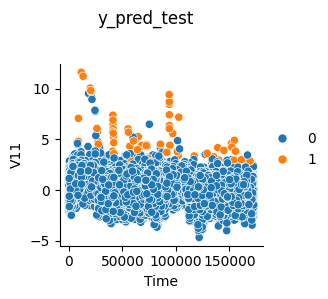

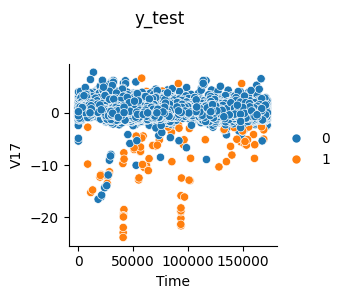

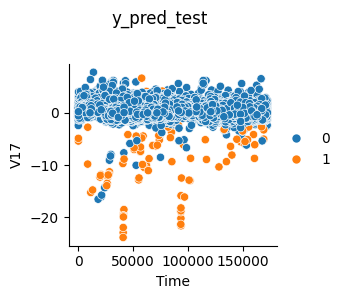

           Time        V1        V2         V3        V4        V5        V6  \
0     -1.122333 -8.419980  5.155546 -12.303259  6.709835 -9.901763 -2.115654   
1     -1.064290  0.173587 -1.646250  -0.088412 -0.978124 -1.042996  0.760057   
2     -1.249140  0.713555 -0.353556   0.111272 -0.726987 -0.388690  0.031139   
3      1.523270 -0.219695  0.990504  -1.101242 -0.246675  0.562754 -0.470347   
4      1.551702  1.026685 -0.081389  -0.670114  0.231046 -0.132003 -0.713900   
...         ...       ...       ...        ...       ...       ...       ...   
71197  1.124401  1.051631 -0.034258  -0.701432  0.296117 -0.117354 -0.913133   
71198  1.126213  0.963905  0.153367  -0.188996  2.390492  0.355864  0.970064   
71199  0.804152  0.954489 -0.378560  -0.754661  0.030372 -0.066371 -0.002629   
71200  0.553298 -0.681442  0.650876  -0.940642 -0.457806  0.503193 -0.362681   
71201 -0.481140  0.750664 -0.669169   0.467474 -1.064947 -1.145672 -0.212850   

              V7        V8        V9  .

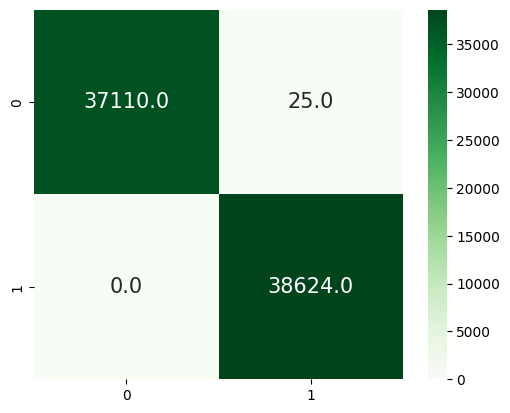

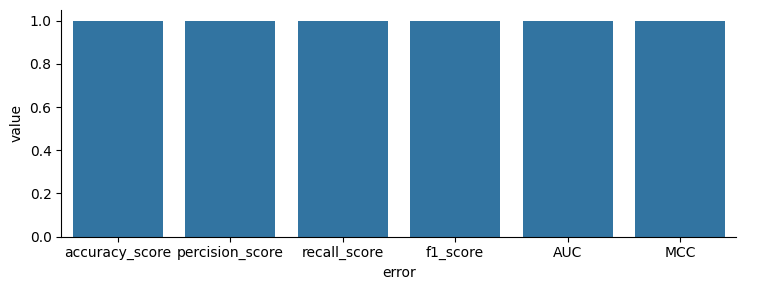

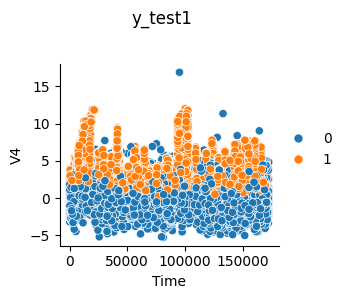

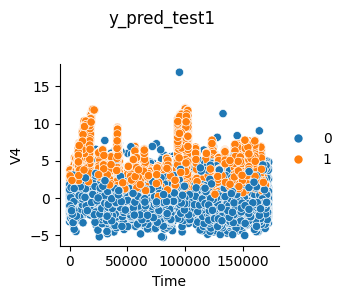

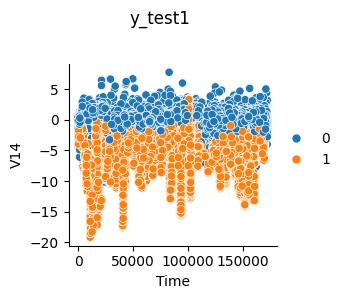

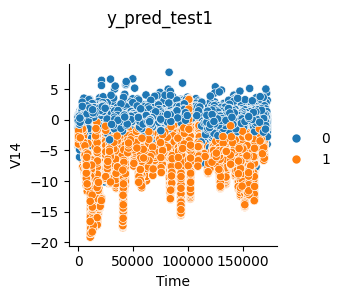

           Time        V1        V2        V3        V4        V5        V6  \
0      0.311162 -0.495771  0.872292 -0.708523  1.841957 -0.322002 -0.547437   
1      0.613119 -0.301401  0.386507 -0.180137  0.402128  0.077775  0.283663   
2      0.742774  0.221421 -1.080317  0.708101 -1.038518  0.582941  0.076057   
3     -0.126856  0.686560 -0.540497  0.540556 -0.843859  0.482955  0.271932   
4     -0.043090  0.244909 -0.404729  0.781964 -1.046898  0.373300  0.174073   
...         ...       ...       ...       ...       ...       ...       ...   
75754  1.067506 -0.343869 -1.570412  0.608064  0.832864  1.599670  0.957799   
75755  1.092900  0.179955 -0.398266  0.726080 -0.561409  0.489594  1.576527   
75756 -0.463664  0.594785 -0.982006  0.730530 -0.920181  0.028325  0.470397   
75757  0.278337 -3.997131  4.271599 -3.159000  2.463517 -3.497024  2.271441   
75758 -0.577182 -0.116260 -0.640262  0.404218  0.439693  0.562185 -0.312122   

             V7        V8        V9  ...       V22 

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_curve, roc_auc_score,matthews_corrcoef
from sklearn.model_selection import cross_val_score,GridSearchCV,cross_val_predict
import json



knc=KNeighborsClassifier()
parameters={'n_neighbors':[2,3,4,5,6,7,8,9,10]}
gs=GridSearchCV(estimator=knc,param_grid=parameters,cv=5,scoring='recall')
gs.fit(x_train,y_train)
print(gs.best_params_)
print(gs.best_score_,'\n')


clf=gs.best_estimator_
y_pred_test=clf.predict(x_test)
y_pred_test_proba=clf.predict_proba(x_test)[:,1]


print(classification_report(y_test,y_pred_test))
cm=confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':15},cmap='Greens')
l3=[]
l4=[]
l3=['accuracy_score','percision_score','recall_score','f1_score','AUC','MCC']
l4=[accuracy_score(y_test,y_pred_test),precision_score(y_test,y_pred_test),recall_score(y_test,y_pred_test),f1_score(y_test,y_pred_test),roc_auc_score(y_test, y_pred_test_proba),matthews_corrcoef(y_test, y_pred_test)]
d2=pd.DataFrame()
d2['error']=l3
d2['value']=l4
print(d2)
sns.catplot(data=d2,x='error',y='value',kind='bar',height=3,aspect=2.5)
plt.show()


sns1=sns.relplot(data=data_test,x=data_test.iloc[:,0],y=data_test.iloc[:,11],hue=y_test,height=3,aspect=1)
plt.xlabel(data_test.columns[0])
plt.ylabel(data_test.columns[11])
sns1.fig.suptitle('y_test')
sns1.fig.subplots_adjust(top=0.8)
plt.show()

sns2=sns.relplot(data=data_test,x=data_test.iloc[:,0],y=data_test.iloc[:,11],hue=y_pred_test,height=3,aspect=1)
plt.xlabel(data_test.columns[0])
plt.ylabel(data_test.columns[11])
sns2.fig.suptitle('y_pred_test')
sns2.fig.subplots_adjust(top=0.8)
plt.show()


sns1=sns.relplot(data=data_test,x=data_test.iloc[:,0],y=data_test.iloc[:,17],hue=y_test,height=3,aspect=1)
plt.xlabel(data_test.columns[0])
plt.ylabel(data_test.columns[17])
sns1.fig.suptitle('y_test')
sns1.fig.subplots_adjust(top=0.8)
plt.show()

sns2=sns.relplot(data=data_test,x=data_test.iloc[:,0],y=data_test.iloc[:,17],hue=y_pred_test,height=3,aspect=1)
plt.xlabel(data_test.columns[0])
plt.ylabel(data_test.columns[17])
sns2.fig.suptitle('y_pred_test')
sns2.fig.subplots_adjust(top=0.8)
plt.show()



dt=pd.DataFrame(x_test,columns=d_x_test.columns)
yt=pd.DataFrame(y_test,columns=['y_test'])
ypt=pd.DataFrame(y_pred_test,columns=['y_pred_test'])
dt=pd.concat([dt,yt],axis=1)
dt=pd.concat([dt,ypt],axis=1)
print(dt,'\n')
dt.to_json('/Users/benyamin/Desktop/Dev/Projects/Laravel/tus/backend/public/reports/data_KNC.json',orient='records',indent=4)


list_score.append('KNC')
list_score.append(l4)
print(list_score,'\n')



fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_proba)
d_roc['KNC']=[fpr,tpr]




d3=pd.DataFrame(cm,index=['Not Fraud','Fraud'],columns=['Not Fraud','Fraud'])
print(d3,'\n')
list_m.append('KNC')
list_cm.append(d3)
print(list_m,'\n')
print(list_cm,'\n')





knc=KNeighborsClassifier()
parameters={'n_neighbors':[2,3,4,5,6,7,8,9,10]}
gs=GridSearchCV(estimator=knc,param_grid=parameters,cv=5,scoring='recall')
gs.fit(x_train1,y_train1)
print(gs.best_params_)
print(gs.best_score_,'\n')


clf=gs.best_estimator_
y_pred_test1=clf.predict(x_test1)
y_pred_test_proba1=clf.predict_proba(x_test1)[:,1]


print(classification_report(y_test1,y_pred_test1))
cm=confusion_matrix(y_test1,y_pred_test1)
sns.heatmap(cm,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':15},cmap='Greens')
l3=[]
l4=[]
l3=['accuracy_score','percision_score','recall_score','f1_score','AUC','MCC']
l4=[accuracy_score(y_test1,y_pred_test1),precision_score(y_test1,y_pred_test1),recall_score(y_test1,y_pred_test1),f1_score(y_test1,y_pred_test1),roc_auc_score(y_test1, y_pred_test_proba1),matthews_corrcoef(y_test1, y_pred_test1)]
d2=pd.DataFrame()
d2['error']=l3
d2['value']=l4
print(d2)
sns.catplot(data=d2,x='error',y='value',kind='bar',height=3,aspect=2.5)
plt.show()


sns1=sns.relplot(data=data_test1,x=data_test1.iloc[:,0],y=data_test1.iloc[:,4],hue=y_test1,height=3,aspect=1)
plt.xlabel(data_test1.columns[0])
plt.ylabel(data_test1.columns[4])
sns1.fig.suptitle('y_test1')
sns1.fig.subplots_adjust(top=0.8)
plt.show()

sns2=sns.relplot(data=data_test1,x=data_test1.iloc[:,0],y=data_test1.iloc[:,4],hue=y_pred_test1,height=3,aspect=1)
plt.xlabel(data_test1.columns[0])
plt.ylabel(data_test1.columns[4])
sns2.fig.suptitle('y_pred_test1')
sns2.fig.subplots_adjust(top=0.8)
plt.show()

sns1=sns.relplot(data=data_test1,x=data_test1.iloc[:,0],y=data_test1.iloc[:,14],hue=y_test1,height=3,aspect=1)
plt.xlabel(data_test1.columns[0])
plt.ylabel(data_test1.columns[14])
sns1.fig.suptitle('y_test1')
sns1.fig.subplots_adjust(top=0.8)
plt.show()

sns2=sns.relplot(data=data_test1,x=data_test1.iloc[:,0],y=data_test1.iloc[:,14],hue=y_pred_test1,height=3,aspect=1)
plt.xlabel(data_test1.columns[0])
plt.ylabel(data_test1.columns[14])
sns2.fig.suptitle('y_pred_test1')
sns2.fig.subplots_adjust(top=0.8)
plt.show()


dt1=pd.DataFrame(x_test1,columns=d_x_test1.columns)
yt1=pd.DataFrame(y_test1,columns=['y_test1'])
ypt1=pd.DataFrame(y_pred_test1,columns=['y_pred_test1'])
dt1=pd.concat([dt1,yt1],axis=1)
dt1=pd.concat([dt1,ypt1],axis=1)
print(dt1,'\n')
dt1.to_json('/Users/benyamin/Desktop/Dev/Projects/Laravel/tus/backend/public/reports/data_KNC1.json',orient='records',indent=4)


list_score.append('KNC1')
list_score.append(l4)
print(list_score,'\n')




fpr, tpr, thresholds = roc_curve(y_test1, y_pred_test_proba1)
d_roc['KNC1']=[fpr,tpr]





d3=pd.DataFrame(cm,index=['Not Fraud','Fraud'],columns=['Not Fraud','Fraud'])
print(d3,'\n')
list_m.append('KNC1')
list_cm.append(d3)
print(list_m,'\n')
print(list_cm,'\n')








Recall scores for each fold: [0.78666667 0.69736842 0.71052632 0.80263158 0.81578947] 

Average Recall: 0.7625964912280702 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.92      0.78      0.84       113

    accuracy                           1.00     71202
   macro avg       0.96      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202

             error     value
0   accuracy_score  0.999537
1  percision_score  0.916667
2     recall_score  0.778761
3         f1_score  0.842105
4              AUC  0.959317
5              MCC  0.844682


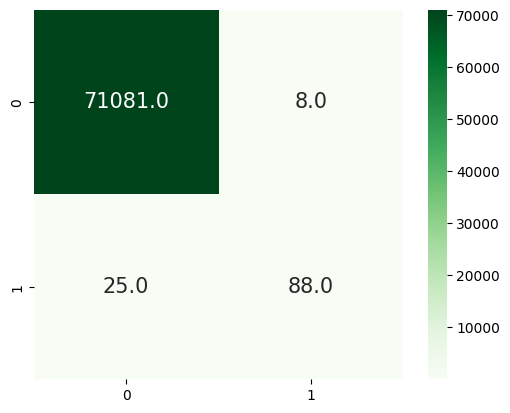

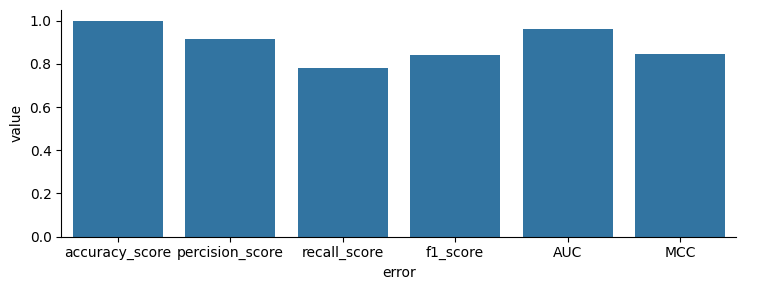

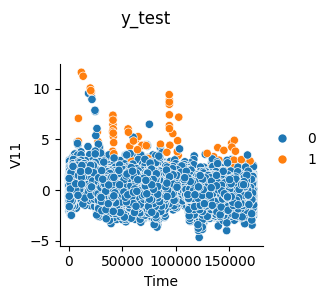

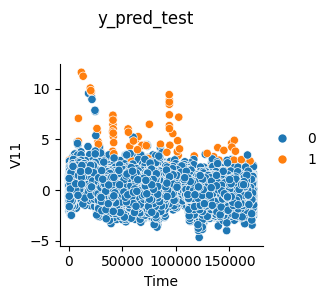

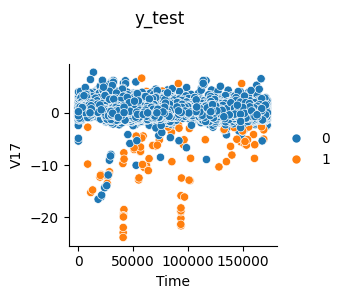

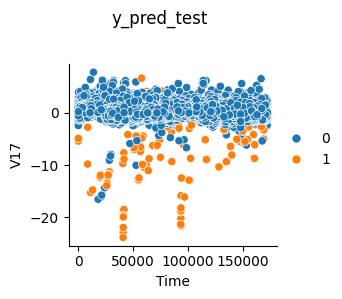

           Time        V1        V2         V3        V4        V5        V6  \
0     -1.122333 -8.419980  5.155546 -12.303259  6.709835 -9.901763 -2.115654   
1     -1.064290  0.173587 -1.646250  -0.088412 -0.978124 -1.042996  0.760057   
2     -1.249140  0.713555 -0.353556   0.111272 -0.726987 -0.388690  0.031139   
3      1.523270 -0.219695  0.990504  -1.101242 -0.246675  0.562754 -0.470347   
4      1.551702  1.026685 -0.081389  -0.670114  0.231046 -0.132003 -0.713900   
...         ...       ...       ...        ...       ...       ...       ...   
71197  1.124401  1.051631 -0.034258  -0.701432  0.296117 -0.117354 -0.913133   
71198  1.126213  0.963905  0.153367  -0.188996  2.390492  0.355864  0.970064   
71199  0.804152  0.954489 -0.378560  -0.754661  0.030372 -0.066371 -0.002629   
71200  0.553298 -0.681442  0.650876  -0.940642 -0.457806  0.503193 -0.362681   
71201 -0.481140  0.750664 -0.669169   0.467474 -1.064947 -1.145672 -0.212850   

              V7        V8        V9  .

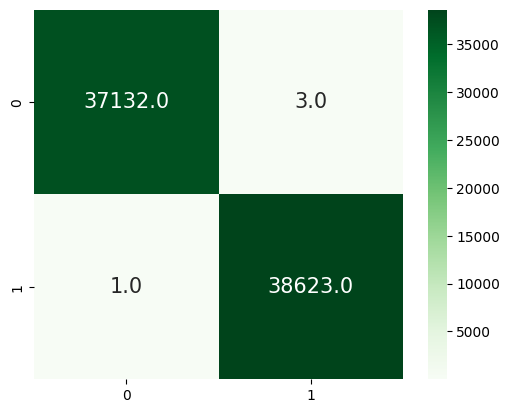

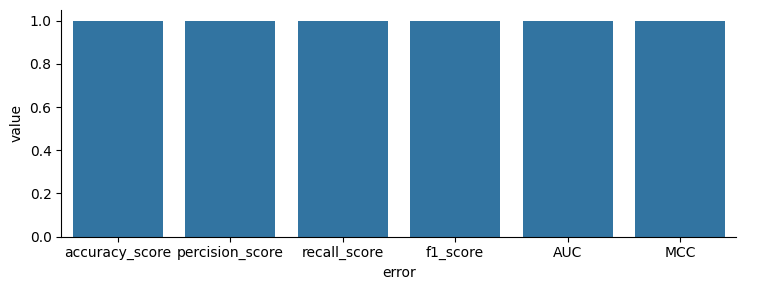

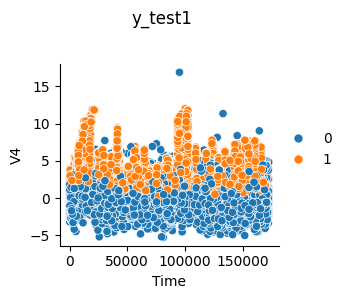

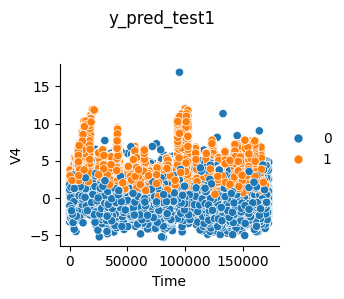

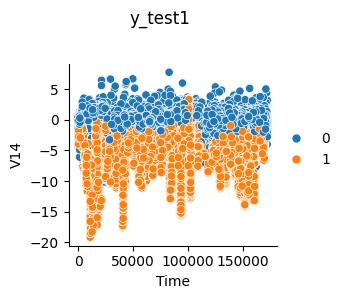

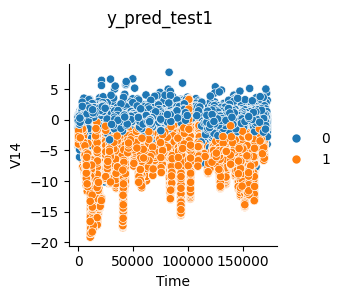

           Time        V1        V2        V3        V4        V5        V6  \
0      0.311162 -0.495771  0.872292 -0.708523  1.841957 -0.322002 -0.547437   
1      0.613119 -0.301401  0.386507 -0.180137  0.402128  0.077775  0.283663   
2      0.742774  0.221421 -1.080317  0.708101 -1.038518  0.582941  0.076057   
3     -0.126856  0.686560 -0.540497  0.540556 -0.843859  0.482955  0.271932   
4     -0.043090  0.244909 -0.404729  0.781964 -1.046898  0.373300  0.174073   
...         ...       ...       ...       ...       ...       ...       ...   
75754  1.067506 -0.343869 -1.570412  0.608064  0.832864  1.599670  0.957799   
75755  1.092900  0.179955 -0.398266  0.726080 -0.561409  0.489594  1.576527   
75756 -0.463664  0.594785 -0.982006  0.730530 -0.920181  0.028325  0.470397   
75757  0.278337 -3.997131  4.271599 -3.159000  2.463517 -3.497024  2.271441   
75758 -0.577182 -0.116260 -0.640262  0.404218  0.439693  0.562185 -0.312122   

             V7        V8        V9  ...       V22 

In [15]:
from sklearn.ensemble import RandomForestClassifier


rfc=RandomForestClassifier(n_estimators=50,random_state=42)


scores=cross_val_score(rfc, x_train, y_train, cv=5, scoring='recall')
print("Recall scores for each fold:", scores,'\n')
print("Average Recall:", scores.mean(),'\n')

rfc.fit(x_train,y_train)
y_pred_test=rfc.predict(x_test)
y_pred_test_proba=rfc.predict_proba(x_test)[:,1]


print(classification_report(y_test,y_pred_test))
cm=confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':15},cmap='Greens')
l3=[]
l4=[]
l3=['accuracy_score','percision_score','recall_score','f1_score','AUC','MCC']
l4=[accuracy_score(y_test,y_pred_test),precision_score(y_test,y_pred_test),recall_score(y_test,y_pred_test),f1_score(y_test,y_pred_test),roc_auc_score(y_test, y_pred_test_proba),matthews_corrcoef(y_test, y_pred_test)]
d2=pd.DataFrame()
d2['error']=l3
d2['value']=l4
print(d2)
sns.catplot(data=d2,x='error',y='value',kind='bar',height=3,aspect=2.5)
plt.show()


sns1=sns.relplot(data=data_test,x=data_test.iloc[:,0],y=data_test.iloc[:,11],hue=y_test,height=3,aspect=1)
plt.xlabel(data_test.columns[0])
plt.ylabel(data_test.columns[11])
sns1.fig.suptitle('y_test')
sns1.fig.subplots_adjust(top=0.8)
plt.show()

sns2=sns.relplot(data=data_test,x=data_test.iloc[:,0],y=data_test.iloc[:,11],hue=y_pred_test,height=3,aspect=1)
plt.xlabel(data_test.columns[0])
plt.ylabel(data_test.columns[11])
sns2.fig.suptitle('y_pred_test')
sns2.fig.subplots_adjust(top=0.8)
plt.show()


sns1=sns.relplot(data=data_test,x=data_test.iloc[:,0],y=data_test.iloc[:,17],hue=y_test,height=3,aspect=1)
plt.xlabel(data_test.columns[0])
plt.ylabel(data_test.columns[17])
sns1.fig.suptitle('y_test')
sns1.fig.subplots_adjust(top=0.8)
plt.show()

sns2=sns.relplot(data=data_test,x=data_test.iloc[:,0],y=data_test.iloc[:,17],hue=y_pred_test,height=3,aspect=1)
plt.xlabel(data_test.columns[0])
plt.ylabel(data_test.columns[17])
sns2.fig.suptitle('y_pred_test')
sns2.fig.subplots_adjust(top=0.8)
plt.show()


dt=pd.DataFrame(x_test,columns=d_x_test.columns)
yt=pd.DataFrame(y_test,columns=['y_test'])
ypt=pd.DataFrame(y_pred_test,columns=['y_pred_test'])
dt=pd.concat([dt,yt],axis=1)
dt=pd.concat([dt,ypt],axis=1)
print(dt,'\n')
dt.to_json('/Users/benyamin/Desktop/Dev/Projects/Laravel/tus/backend/public/reports/data_RFC.json',orient='records',indent=4)



list_score.append('RFC')
list_score.append(l4)
print(list_score,'\n')



fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_proba)
d_roc['RFC']=[fpr,tpr]




d3=pd.DataFrame(cm,index=['Not Fraud','Fraud'],columns=['Not Fraud','Fraud'])
print(d3,'\n')
list_m.append('RFC')
list_cm.append(d3)
print(list_m,'\n')
print(list_cm,'\n')





scores=cross_val_score(rfc, x_train1, y_train1, cv=5, scoring='recall')
print("Recall scores for each fold:", scores,'\n')
print("Average Recall:", scores.mean(),'\n')


rfc.fit(x_train1,y_train1)
y_pred_test1=rfc.predict(x_test1)
y_pred_test_proba1=rfc.predict_proba(x_test1)[:,1]


print(classification_report(y_test1,y_pred_test1))
cm=confusion_matrix(y_test1,y_pred_test1)
sns.heatmap(cm,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':15},cmap='Greens')
l3=[]
l4=[]
l3=['accuracy_score','percision_score','recall_score','f1_score','AUC','MCC']
l4=[accuracy_score(y_test1,y_pred_test1),precision_score(y_test1,y_pred_test1),recall_score(y_test1,y_pred_test1),f1_score(y_test1,y_pred_test1),roc_auc_score(y_test1, y_pred_test_proba1),matthews_corrcoef(y_test1, y_pred_test1)]
d2=pd.DataFrame()
d2['error']=l3
d2['value']=l4
print(d2)
sns.catplot(data=d2,x='error',y='value',kind='bar',height=3,aspect=2.5)
plt.show()


sns1=sns.relplot(data=data_test1,x=data_test1.iloc[:,0],y=data_test1.iloc[:,4],hue=y_test1,height=3,aspect=1)
plt.xlabel(data_test1.columns[0])
plt.ylabel(data_test1.columns[4])
sns1.fig.suptitle('y_test1')
sns1.fig.subplots_adjust(top=0.8)
plt.show()

sns2=sns.relplot(data=data_test1,x=data_test1.iloc[:,0],y=data_test1.iloc[:,4],hue=y_pred_test1,height=3,aspect=1)
plt.xlabel(data_test1.columns[0])
plt.ylabel(data_test1.columns[4])
sns2.fig.suptitle('y_pred_test1')
sns2.fig.subplots_adjust(top=0.8)
plt.show()



sns1=sns.relplot(data=data_test1,x=data_test1.iloc[:,0],y=data_test1.iloc[:,14],hue=y_test1,height=3,aspect=1)
plt.xlabel(data_test1.columns[0])
plt.ylabel(data_test1.columns[14])
sns1.fig.suptitle('y_test1')
sns1.fig.subplots_adjust(top=0.8)
plt.show()

sns2=sns.relplot(data=data_test1,x=data_test1.iloc[:,0],y=data_test1.iloc[:,14],hue=y_pred_test1,height=3,aspect=1)
plt.xlabel(data_test1.columns[0])
plt.ylabel(data_test1.columns[14])
sns2.fig.suptitle('y_pred_test1')
sns2.fig.subplots_adjust(top=0.8)
plt.show()


dt1=pd.DataFrame(x_test1,columns=d_x_test1.columns)
yt1=pd.DataFrame(y_test1,columns=['y_test1'])
ypt1=pd.DataFrame(y_pred_test1,columns=['y_pred_test1'])
dt1=pd.concat([dt1,yt1],axis=1)
dt1=pd.concat([dt1,ypt1],axis=1)
print(dt1,'\n')
dt1.to_json('/Users/benyamin/Desktop/Dev/Projects/Laravel/tus/backend/public/reports/data_RFC1.json',orient='records',indent=4)



list_score.append('RFC1')
list_score.append(l4)
print(list_score,'\n')



fpr, tpr, thresholds = roc_curve(y_test1, y_pred_test_proba1)
d_roc['RFC1']=[fpr,tpr]




d3=pd.DataFrame(cm,index=['Not Fraud','Fraud'],columns=['Not Fraud','Fraud'])
print(d3,'\n')
list_m.append('RFC1')
list_cm.append(d3)
print(list_m,'\n')
print(list_cm,'\n')







Recall scores for each fold: [0.85333333 0.71052632 0.77631579 0.81578947 0.82894737] 

Average Recall: 0.7969824561403509 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.92      0.74      0.82       113

    accuracy                           1.00     71202
   macro avg       0.96      0.87      0.91     71202
weighted avg       1.00      1.00      1.00     71202

             error     value
0   accuracy_score  0.999494
1  percision_score  0.923077
2     recall_score  0.743363
3         f1_score  0.823529
4              AUC  0.984477
5              MCC  0.828123


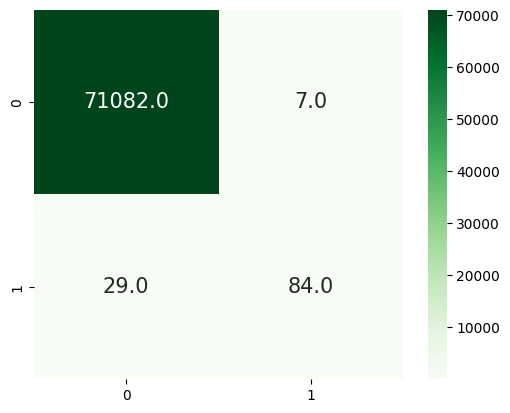

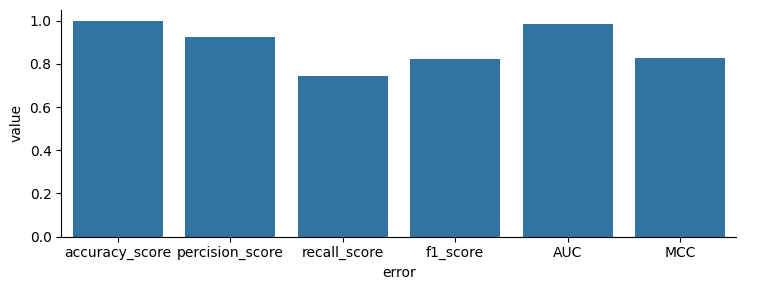

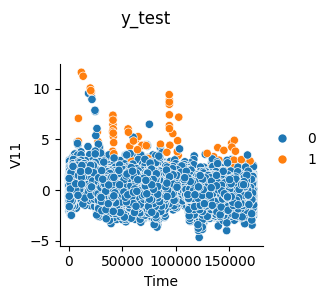

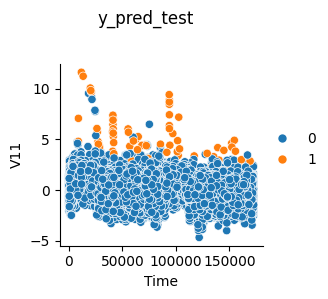

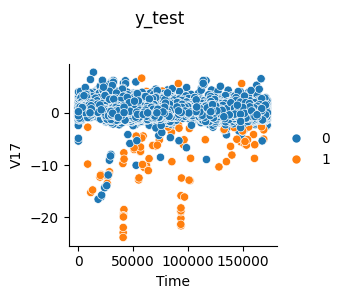

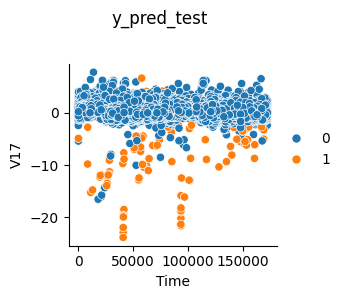

           Time        V1        V2         V3        V4        V5        V6  \
0     -1.122333 -8.419980  5.155546 -12.303259  6.709835 -9.901763 -2.115654   
1     -1.064290  0.173587 -1.646250  -0.088412 -0.978124 -1.042996  0.760057   
2     -1.249140  0.713555 -0.353556   0.111272 -0.726987 -0.388690  0.031139   
3      1.523270 -0.219695  0.990504  -1.101242 -0.246675  0.562754 -0.470347   
4      1.551702  1.026685 -0.081389  -0.670114  0.231046 -0.132003 -0.713900   
...         ...       ...       ...        ...       ...       ...       ...   
71197  1.124401  1.051631 -0.034258  -0.701432  0.296117 -0.117354 -0.913133   
71198  1.126213  0.963905  0.153367  -0.188996  2.390492  0.355864  0.970064   
71199  0.804152  0.954489 -0.378560  -0.754661  0.030372 -0.066371 -0.002629   
71200  0.553298 -0.681442  0.650876  -0.940642 -0.457806  0.503193 -0.362681   
71201 -0.481140  0.750664 -0.669169   0.467474 -1.064947 -1.145672 -0.212850   

              V7        V8        V9  .

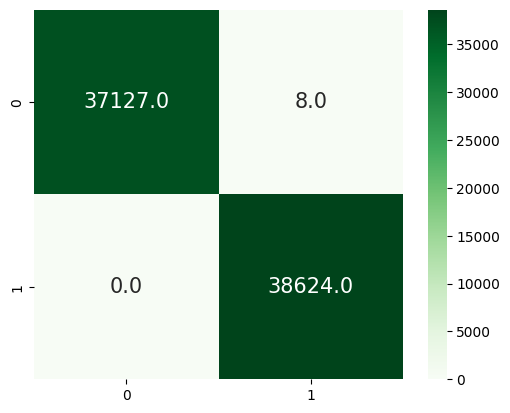

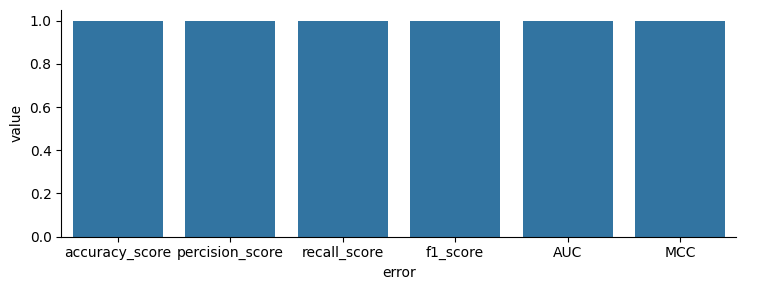

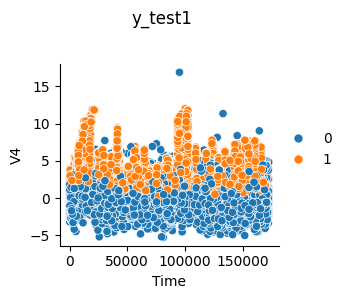

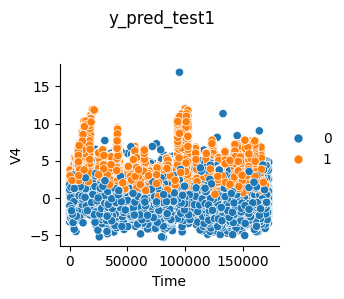

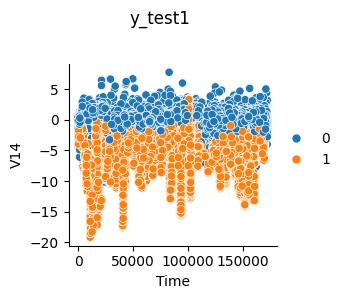

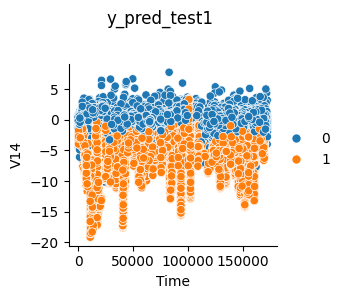

           Time        V1        V2        V3        V4        V5        V6  \
0      0.311162 -0.495771  0.872292 -0.708523  1.841957 -0.322002 -0.547437   
1      0.613119 -0.301401  0.386507 -0.180137  0.402128  0.077775  0.283663   
2      0.742774  0.221421 -1.080317  0.708101 -1.038518  0.582941  0.076057   
3     -0.126856  0.686560 -0.540497  0.540556 -0.843859  0.482955  0.271932   
4     -0.043090  0.244909 -0.404729  0.781964 -1.046898  0.373300  0.174073   
...         ...       ...       ...       ...       ...       ...       ...   
75754  1.067506 -0.343869 -1.570412  0.608064  0.832864  1.599670  0.957799   
75755  1.092900  0.179955 -0.398266  0.726080 -0.561409  0.489594  1.576527   
75756 -0.463664  0.594785 -0.982006  0.730530 -0.920181  0.028325  0.470397   
75757  0.278337 -3.997131  4.271599 -3.159000  2.463517 -3.497024  2.271441   
75758 -0.577182 -0.116260 -0.640262  0.404218  0.439693  0.562185 -0.312122   

             V7        V8        V9  ...       V22 

In [16]:
import xgboost as xgb



xgbc=xgb.XGBClassifier(n_estimators=1000,learning_rate=0.1,gamma=0.5,reg_alpha=0.5,reg_lambda=1,max_depth=10,subsample=0.9,colsample_bytree=0.9,random_state=42)


scores=cross_val_score(xgbc, x_train, y_train, cv=5, scoring='recall')
print("Recall scores for each fold:", scores,'\n')
print("Average Recall:", scores.mean(),'\n')



xgbc.fit(x_train,y_train)
y_pred_test=xgbc.predict(x_test)
y_pred_test_proba=xgbc.predict_proba(x_test)[:,1]


print(classification_report(y_test,y_pred_test))
cm=confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':15},cmap='Greens')
l3=[]
l4=[]
l3=['accuracy_score','percision_score','recall_score','f1_score','AUC','MCC']
l4=[accuracy_score(y_test,y_pred_test),precision_score(y_test,y_pred_test),recall_score(y_test,y_pred_test),f1_score(y_test,y_pred_test),roc_auc_score(y_test, y_pred_test_proba),matthews_corrcoef(y_test, y_pred_test)]
d2=pd.DataFrame()
d2['error']=l3
d2['value']=l4
print(d2)
sns.catplot(data=d2,x='error',y='value',kind='bar',height=3,aspect=2.5)
plt.show()


sns1=sns.relplot(data=data_test,x=data_test.iloc[:,0],y=data_test.iloc[:,11],hue=y_test,height=3,aspect=1)
plt.xlabel(data_test.columns[0])
plt.ylabel(data_test.columns[11])
sns1.fig.suptitle('y_test')
sns1.fig.subplots_adjust(top=0.8)
plt.show()

sns2=sns.relplot(data=data_test,x=data_test.iloc[:,0],y=data_test.iloc[:,11],hue=y_pred_test,height=3,aspect=1)
plt.xlabel(data_test.columns[0])
plt.ylabel(data_test.columns[11])
sns2.fig.suptitle('y_pred_test')
sns2.fig.subplots_adjust(top=0.8)
plt.show()


sns1=sns.relplot(data=data_test,x=data_test.iloc[:,0],y=data_test.iloc[:,17],hue=y_test,height=3,aspect=1)
plt.xlabel(data_test.columns[0])
plt.ylabel(data_test.columns[17])
sns1.fig.suptitle('y_test')
sns1.fig.subplots_adjust(top=0.8)
plt.show()

sns2=sns.relplot(data=data_test,x=data_test.iloc[:,0],y=data_test.iloc[:,17],hue=y_pred_test,height=3,aspect=1)
plt.xlabel(data_test.columns[0])
plt.ylabel(data_test.columns[17])
sns2.fig.suptitle('y_pred_test')
sns2.fig.subplots_adjust(top=0.8)
plt.show()


dt=pd.DataFrame(x_test,columns=d_x_test.columns)
yt=pd.DataFrame(y_test,columns=['y_test'])
ypt=pd.DataFrame(y_pred_test,columns=['y_pred_test'])
dt=pd.concat([dt,yt],axis=1)
dt=pd.concat([dt,ypt],axis=1)
print(dt,'\n')
dt.to_json('/Users/benyamin/Desktop/Dev/Projects/Laravel/tus/backend/public/reports/data_XGB.json',orient='records',indent=4)



list_score.append('XGB')
list_score.append(l4)
print(list_score,'\n')



fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_proba)
d_roc['XGB']=[fpr,tpr]




d3=pd.DataFrame(cm,index=['Not Fraud','Fraud'],columns=['Not Fraud','Fraud'])
print(d3,'\n')
list_m.append('XGB')
list_cm.append(d3)
print(list_m,'\n')
print(list_cm,'\n')





scores=cross_val_score(xgbc, x_train1, y_train1, cv=5, scoring='recall')
print("Recall scores for each fold:", scores,'\n')
print("Average Recall:", scores.mean(),'\n')


xgbc.fit(x_train1,y_train1)
y_pred_test1=xgbc.predict(x_test1)
y_pred_test_proba1=xgbc.predict_proba(x_test1)[:,1]


print(classification_report(y_test1,y_pred_test1))
cm=confusion_matrix(y_test1,y_pred_test1)
sns.heatmap(cm,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':15},cmap='Greens')
l3=[]
l4=[]
l3=['accuracy_score','percision_score','recall_score','f1_score','AUC','MCC']
l4=[accuracy_score(y_test1,y_pred_test1),precision_score(y_test1,y_pred_test1),recall_score(y_test1,y_pred_test1),f1_score(y_test1,y_pred_test1),roc_auc_score(y_test1, y_pred_test_proba1),matthews_corrcoef(y_test1, y_pred_test1)]
d2=pd.DataFrame()
d2['error']=l3
d2['value']=l4
print(d2)
sns.catplot(data=d2,x='error',y='value',kind='bar',height=3,aspect=2.5)
plt.show()


sns1=sns.relplot(data=data_test1,x=data_test1.iloc[:,0],y=data_test1.iloc[:,4],hue=y_test1,height=3,aspect=1)
plt.xlabel(data_test1.columns[0])
plt.ylabel(data_test1.columns[4])
sns1.fig.suptitle('y_test1')
sns1.fig.subplots_adjust(top=0.8)
plt.show()

sns2=sns.relplot(data=data_test1,x=data_test1.iloc[:,0],y=data_test1.iloc[:,4],hue=y_pred_test1,height=3,aspect=1)
plt.xlabel(data_test1.columns[0])
plt.ylabel(data_test1.columns[4])
sns2.fig.suptitle('y_pred_test1')
sns2.fig.subplots_adjust(top=0.8)
plt.show()


sns1=sns.relplot(data=data_test1,x=data_test1.iloc[:,0],y=data_test1.iloc[:,14],hue=y_test1,height=3,aspect=1)
plt.xlabel(data_test1.columns[0])
plt.ylabel(data_test1.columns[14])
sns1.fig.suptitle('y_test1')
sns1.fig.subplots_adjust(top=0.8)
plt.show()

sns2=sns.relplot(data=data_test1,x=data_test1.iloc[:,0],y=data_test1.iloc[:,14],hue=y_pred_test1,height=3,aspect=1)
plt.xlabel(data_test1.columns[0])
plt.ylabel(data_test1.columns[14])
sns2.fig.suptitle('y_pred_test1')
sns2.fig.subplots_adjust(top=0.8)
plt.show()


dt1=pd.DataFrame(x_test1,columns=d_x_test1.columns)
yt1=pd.DataFrame(y_test1,columns=['y_test1'])
ypt1=pd.DataFrame(y_pred_test1,columns=['y_pred_test1'])
dt1=pd.concat([dt1,yt1],axis=1)
dt1=pd.concat([dt1,ypt1],axis=1)
print(dt1,'\n')
dt1.to_json('/Users/benyamin/Desktop/Dev/Projects/Laravel/tus/backend/public/reports/data_XGB1.json',orient='records',indent=4)



list_score.append('XGB1')
list_score.append(l4)
print(list_score,'\n')



fpr, tpr, thresholds = roc_curve(y_test1, y_pred_test_proba1)
d_roc['XGB1']=[fpr,tpr]




d3=pd.DataFrame(cm,index=['Not Fraud','Fraud'],columns=['Not Fraud','Fraud'])
print(d3,'\n')
list_m.append('XGB1')
list_cm.append(d3)
print(list_m,'\n')
print(list_cm,'\n')







Recall scores for each fold: [1.         1.         1.         0.99995783 1.        ] 

Average Recall: 0.9999915652742339 

[0 0 1 ... 1 0 0] 

[[0 0 1 ... 1 0 0]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37135
           1       1.00      1.00      1.00     38624

    accuracy                           1.00     75759
   macro avg       1.00      1.00      1.00     75759
weighted avg       1.00      1.00      1.00     75759

             error     value
0   accuracy_score  0.999960
1  percision_score  0.999922
2     recall_score  1.000000
3         f1_score  0.999961
4              AUC  1.000000
5              MCC  0.999921


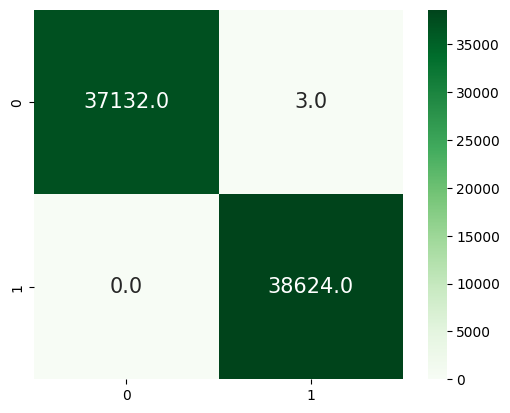

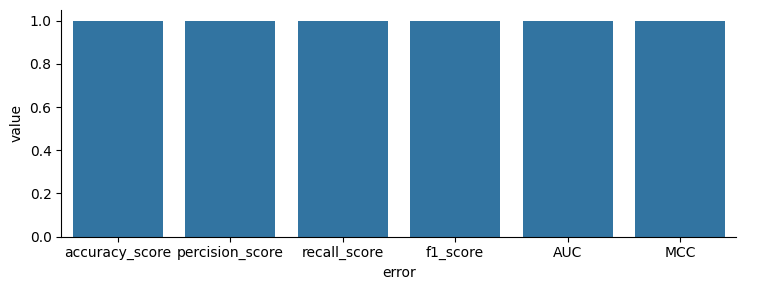

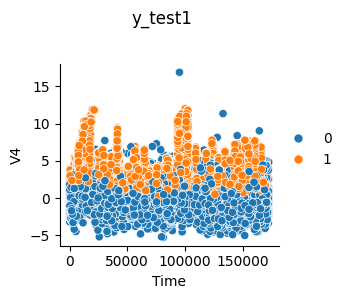

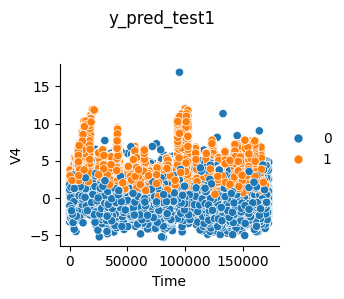

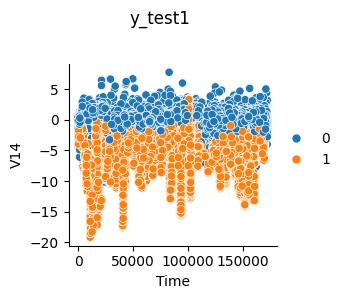

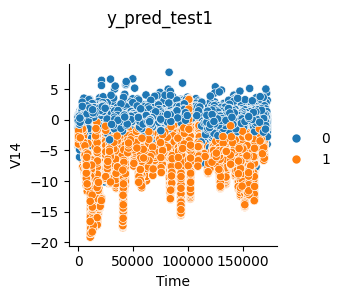

           Time        V1        V2        V3        V4        V5        V6  \
0      0.311162 -0.495771  0.872292 -0.708523  1.841957 -0.322002 -0.547437   
1      0.613119 -0.301401  0.386507 -0.180137  0.402128  0.077775  0.283663   
2      0.742774  0.221421 -1.080317  0.708101 -1.038518  0.582941  0.076057   
3     -0.126856  0.686560 -0.540497  0.540556 -0.843859  0.482955  0.271932   
4     -0.043090  0.244909 -0.404729  0.781964 -1.046898  0.373300  0.174073   
...         ...       ...       ...       ...       ...       ...       ...   
75754  1.067506 -0.343869 -1.570412  0.608064  0.832864  1.599670  0.957799   
75755  1.092900  0.179955 -0.398266  0.726080 -0.561409  0.489594  1.576527   
75756 -0.463664  0.594785 -0.982006  0.730530 -0.920181  0.028325  0.470397   
75757  0.278337 -3.997131  4.271599 -3.159000  2.463517 -3.497024  2.271441   
75758 -0.577182 -0.116260 -0.640262  0.404218  0.439693  0.562185 -0.312122   

             V7        V8        V9  ...       V22 

In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


knc=KNeighborsClassifier(n_neighbors=2)
rfc=RandomForestClassifier(n_estimators=50,random_state=42)
xgbc=xgb.XGBClassifier(n_estimators=1000,learning_rate=0.1,gamma=0.5,reg_alpha=0.5,reg_lambda=1,max_depth=10,subsample=0.9,colsample_bytree=0.9,random_state=42)


vc=VotingClassifier(estimators=[('knc',knc),('rfc', rfc),('xgbc',xgbc)], voting='soft',weights=[1,2,1])



scores=cross_val_score(vc, x_train1, y_train1, cv=5, scoring='recall')
print("Recall scores for each fold:", scores,'\n')
print("Average Recall:", scores.mean(),'\n')


y_train2=y_train1.copy()
y_train2=y_train2.reshape(1,-1)
print(y_train1,'\n')
print(y_train2,'\n')
vc.fit(x_train1, y_train2[0])
y_pred_test1=vc.predict(x_test1)
y_pred_test_proba1=vc.predict_proba(x_test1)[:,1]


print(classification_report(y_test1,y_pred_test1))
cm=confusion_matrix(y_test1,y_pred_test1)
sns.heatmap(cm,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':15},cmap='Greens')
l3=[]
l4=[]
l3=['accuracy_score','percision_score','recall_score','f1_score','AUC','MCC']
l4=[accuracy_score(y_test1,y_pred_test1),precision_score(y_test1,y_pred_test1),recall_score(y_test1,y_pred_test1),f1_score(y_test1,y_pred_test1),roc_auc_score(y_test1, y_pred_test_proba1),matthews_corrcoef(y_test1, y_pred_test1)]
d2=pd.DataFrame()
d2['error']=l3
d2['value']=l4
print(d2)
sns.catplot(data=d2,x='error',y='value',kind='bar',height=3,aspect=2.5)
plt.show()


sns1=sns.relplot(data=data_test1,x=data_test1.iloc[:,0],y=data_test1.iloc[:,4],hue=y_test1,height=3,aspect=1)
plt.xlabel(data_test1.columns[0])
plt.ylabel(data_test1.columns[4])
sns1.fig.suptitle('y_test1')
sns1.fig.subplots_adjust(top=0.8)
plt.show()

sns2=sns.relplot(data=data_test1,x=data_test1.iloc[:,0],y=data_test1.iloc[:,4],hue=y_pred_test1,height=3,aspect=1)
plt.xlabel(data_test1.columns[0])
plt.ylabel(data_test1.columns[4])
sns2.fig.suptitle('y_pred_test1')
sns2.fig.subplots_adjust(top=0.8)
plt.show()


sns1=sns.relplot(data=data_test1,x=data_test1.iloc[:,0],y=data_test1.iloc[:,14],hue=y_test1,height=3,aspect=1)
plt.xlabel(data_test1.columns[0])
plt.ylabel(data_test1.columns[14])
sns1.fig.suptitle('y_test1')
sns1.fig.subplots_adjust(top=0.8)
plt.show()

sns2=sns.relplot(data=data_test1,x=data_test1.iloc[:,0],y=data_test1.iloc[:,14],hue=y_pred_test1,height=3,aspect=1)
plt.xlabel(data_test1.columns[0])
plt.ylabel(data_test1.columns[14])
sns2.fig.suptitle('y_pred_test1')
sns2.fig.subplots_adjust(top=0.8)
plt.show()

dt1=pd.DataFrame(x_test1,columns=d_x_test1.columns)
yt1=pd.DataFrame(y_test1,columns=['y_test1'])
ypt1=pd.DataFrame(y_pred_test1,columns=['y_pred_test1'])
dt1=pd.concat([dt1,yt1],axis=1)
dt1=pd.concat([dt1,ypt1],axis=1)
print(dt1,'\n')
dt1.to_json('/Users/benyamin/Desktop/Dev/Projects/Laravel/tus/backend/public/reports/data_VC.json',orient='records',indent=4)


list_score.append('VC')
list_score.append(l4)
print(list_score,'\n')



fpr, tpr, thresholds = roc_curve(y_test1, y_pred_test_proba1)
d_roc['VC']=[fpr,tpr]




d3=pd.DataFrame(cm,index=['Not Fraud','Fraud'],columns=['Not Fraud','Fraud'])
print(d3,'\n')
list_m.append('VC')
list_cm.append(d3)
print(list_m,'\n')
print(list_cm,'\n')







score_sorted:
  index accuracy_score percision_score recall_score  f1_score       AUC  \
0  KNC1        0.99967        0.999353          1.0  0.999676  0.999663   
1  XGB1       0.999894        0.999793          1.0  0.999896  0.999995   
2    VC        0.99996        0.999922          1.0  0.999961       1.0   
3  RFC1       0.999947        0.999922     0.999974  0.999948       1.0   
4   RFC       0.999537        0.916667     0.778761  0.842105  0.959317   
5   KNC       0.999522        0.915789     0.769912  0.836538  0.924659   
6   XGB       0.999494        0.923077     0.743363  0.823529  0.984477   

        MCC  
0   0.99934  
1  0.999789  
2  0.999921  
3  0.999894  
4  0.844682  
5   0.83946  
6  0.828123   



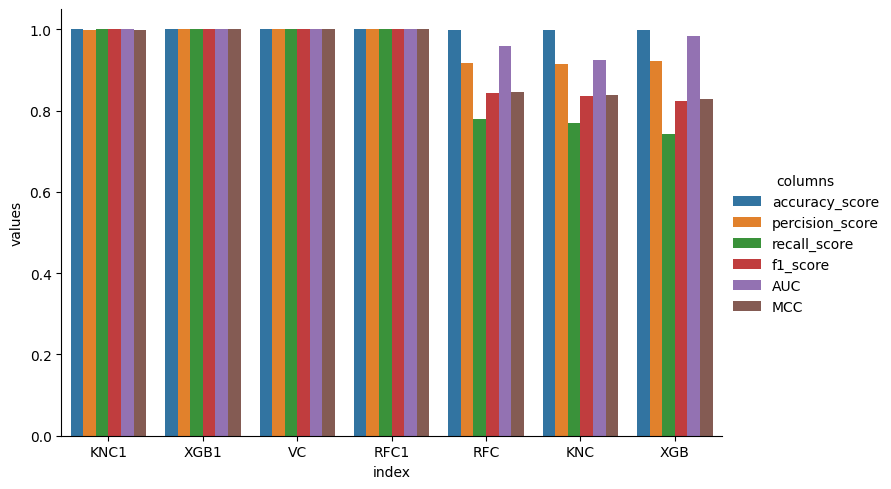

In [18]:

score=pd.DataFrame(columns=['accuracy_score','percision_score','recall_score','f1_score','AUC','MCC'])

for i in range(0,len(list_score),2):
    score.loc[list_score[i],:]=list_score[i+1]


score_sorted=score.sort_values(by=['recall_score'],ascending=False)
score_sorted=score_sorted.reset_index()


score_sorted1=score_sorted.sort_values(by=['percision_score'],ascending=False)
score_sorted1=score_sorted1.reset_index()


print('score_sorted1:')
print(score_sorted1,'\n')

score_sorted_melted = score_sorted1.melt(id_vars='index', var_name='columns', value_name='values')

sns.catplot(data=score_sorted_melted, x='index', y='values', kind='bar', hue='columns', aspect=1.5)
plt.show()


score_sorted1.to_json('/Users/benyamin/Desktop/Dev/Projects/Laravel/tus/backend/public/reports/score.json',orient='records',indent=4)






                                                 KNC  \
0  [0.0, 5.626749567443627e-05, 0.000112534991348...   
1  [0.0, 0.6902654867256637, 0.7699115044247787, ...   

                                                KNC1  \
0  [0.0, 0.0006732193348592972, 0.001292581122929...   
1                               [0.0, 1.0, 1.0, 1.0]   

                                                 RFC  \
0  [0.0, 0.0, 0.0, 1.4066873918609068e-05, 2.8133...   
1  [0.0, 0.13274336283185842, 0.26548672566371684...   

                                                RFC1  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 2.6928773394371888e-...   
1  [0.0, 0.9649181855840928, 0.985630695940348, 0...   

                                                 XGB  \
0  [0.0, 0.0, 0.0, 0.0, 1.4066873918609068e-05, 1...   
1  [0.0, 0.008849557522123894, 0.2566371681415929...   

                                                XGB1  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 2.589063794531897e-05, 7.767191383

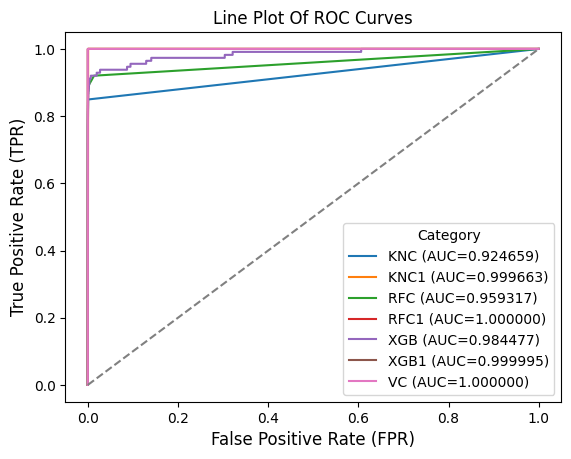

In [19]:

data_roc=pd.DataFrame(d_roc)
print(data_roc,'\n')
data_roc.to_json('/Users/benyamin/Desktop/Dev/Projects/Laravel/tus/backend/public/reports/data_roc.json',orient='records',indent=4)

lines = []
labels = []

for i in  range(0,len(data_roc.columns)):
    line,= plt.plot(
       data_roc.iloc[0,i],  
       data_roc.iloc[1,i]  
    )
    lines.append(line)   
    labels.append(f"{data_roc.columns[i]} (AUC={score['AUC'][i]:.6f})")
 

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.title('ROC Curve for Classification Models', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(lines, labels, title='Category') 
plt.title('Line Plot Of ROC Curves')
plt.show()








In [20]:
data_cm=pd.DataFrame(columns=['MODEL','CM'])


data_cm.loc[:,'MODEL']=list_m
data_cm.loc[:,'CM']=list_cm

print(data_cm,'\n')

data_cm.to_json('/Users/benyamin/Desktop/Dev/Projects/Laravel/tus/backend/public/reports/data_cm.json',orient='records',indent=4)

  MODEL                                                 CM
0   KNC             Not Fraud  Fraud
Not Fraud      710...
1  KNC1             Not Fraud  Fraud
Not Fraud      371...
2   RFC             Not Fraud  Fraud
Not Fraud      710...
3  RFC1             Not Fraud  Fraud
Not Fraud      371...
4   XGB             Not Fraud  Fraud
Not Fraud      710...
5  XGB1             Not Fraud  Fraud
Not Fraud      371...
6    VC             Not Fraud  Fraud
Not Fraud      371... 

